In [1]:
from burstextractor.burstlist import download_burst_list, process_burst_list
from burstextractor.timeutils import extract_time, fix_typos_in_time, fix_24_hour_time, create_datetime, check_valid_date, adjust_year_month
from burstextractor.data_utils import explode_instruments_long_clean_instruments, keep_only_type_I_to_VI
from spectogram_utils import spec_to_pd_dataframe, plot_spectogram
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt 
from radiospectra.sources import CallistoSpectrogram

In [2]:
burst_list = pd.read_excel('burst_list.xlsx')
burst_list.sample(5)

,date,time,type,instruments,time_start,time_end,date_start,date_end,datetime_start,datetime_end
16342,20220830,02:25-02:25,III,ALASKA-COHOE,02:25,02:25,20220830,20220830,2022-08-30 02:25:00,2022-08-30 02:25:00
2709,20210830,10:43-10:48,III,GLASGOW,10:43,10:48,20210830,20210830,2021-08-30 10:43:00,2021-08-30 10:48:00
13997,20220705,11:03-11:15,III,EGYPT-Alexandria,11:03,11:15,20220705,20220705,2022-07-05 11:03:00,2022-07-05 11:15:00
7717,20220329,19:25-19:25,III,Arecibo-Observatory,19:25,19:25,20220329,20220329,2022-03-29 19:25:00,2022-03-29 19:25:00
17132,20220920,04:59-04:59,III,INDIA-UDAIPUR,04:59,04:59,20220920,20220920,2022-09-20 04:59:00,2022-09-20 04:59:00


In [3]:
IMAGE_FOLDER = 'images'
IMAGE_LEN = pd.Timedelta('30m')
# CallistoSpectrogram.from_range('ALASKA-ANCHORAGE', '2023-01-01T20:00:00', '2023-01-02T04:50:00')

def download_spectogram(df_row, mid_time, duration, subtract_background=True):
    spec = CallistoSpectrogram.from_range(df_row['instruments'], mid_time - duration / 2,  mid_time + duration / 2)
    spec = spec.remove_border()
    if subtract_background:
        spec = spec.subtract_bg()
    spec = spec_to_pd_dataframe(spec, df_row)
    spec = spec[mid_time - duration / 2:mid_time + duration / 2]
    return spec

def download_spectogram_from_df_row(df_row, duration):
    mid_time = df_row['datetime_start'] + (df_row['datetime_end'] - df_row['datetime_start']) / 2
    return download_spectogram(df_row, mid_time, duration)

In [4]:
spec = download_spectogram_from_df_row(burst_list.iloc[5], IMAGE_LEN)

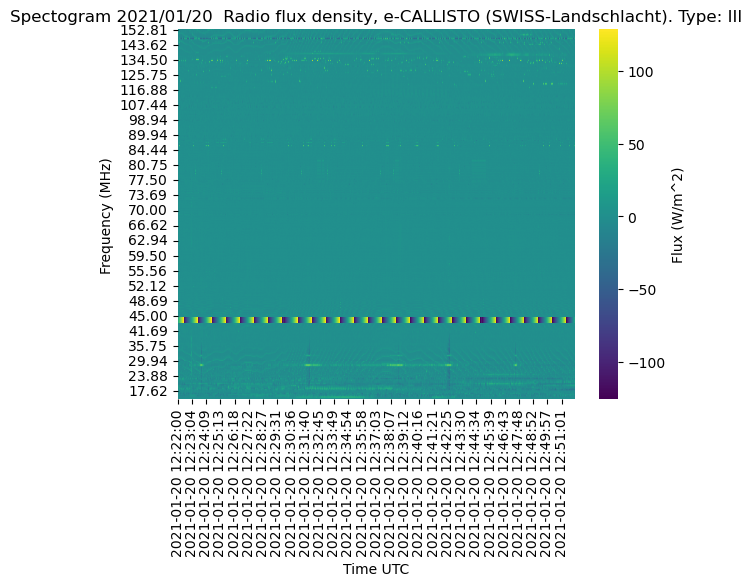

In [10]:
plot_spectogram(spec)